## Credit Card Fraud Detection.
## Scikit-Learn vs Snap ML

#### This project is to compare Snap ML library, provided by IBM with the scikit-learn library, using the popular kaggle data set for credit card fraud detection on decion tree model. The Snap ML library is a Machine learning library provided by IBM with GPU accelerator enabled and has high prediction accuracy. With snap ML, our data set can run through our model more faster, compared to scikit-learn

In [1]:
#install the snap ML library
!pip install snapml

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, StandardScaler
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [3]:
path= './creditcard.csv'

#### The data set is a historical data set of credit card transaction made by European cardholders in September 2013. Due to confidential reasons, the actual feature of the dataset wasn't available but that wont be a problem for us since we are working for illustrative purpose.

In [4]:
df=pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# read the input data
print("There are " + str(len(df)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(df.columns)) + " variables in the dataset.")



There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


##### Th data set contains 284,807 observations (rows) and 31 columns, with two classes (1 & 0), 1 for fraud (positive) and 0 for No fraud (negative). We can increase the size of this data set to have a larger data by replecating each value 10 times.  

In [6]:
n_replicas = 10
# replecate each value
data = pd.DataFrame(np.repeat(df.values, n_replicas, axis=0), columns=df.columns)

print("There are " + str(len(data)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(data.columns)) + " variables in the dataset.")

data.head()

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


### Analyzing the class and the amount column

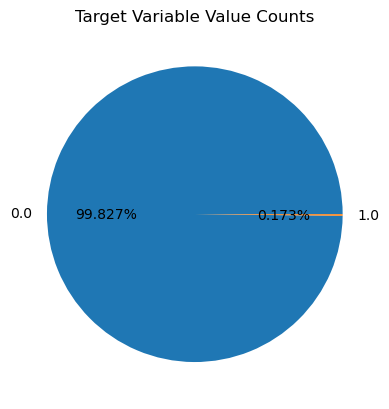

In [7]:
#plot a pie chat of our class column
labels = data.Class.unique()

sizes = data.Class.value_counts().values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

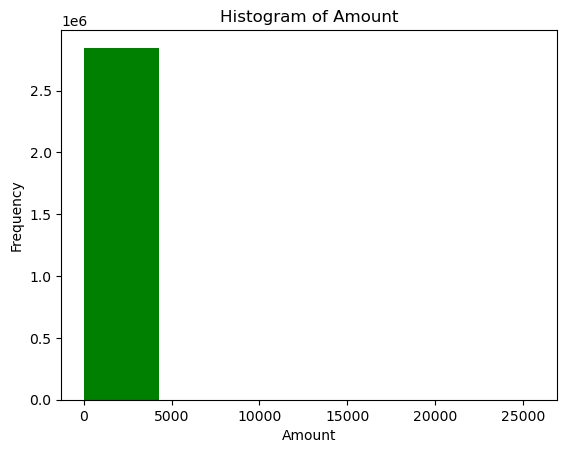

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [8]:
# a bar plot of the amount column
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount')
plt.hist(data.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(data.Amount.values))
print("Maximum amount value is ", np.max(data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(data.Amount.values, 90))

#### Initializing feature and target column and normalizing the feature columns

In [9]:
feature=data.iloc[:,1:30]
target=data.iloc[:,30]
feature=StandardScaler().fit_transform(feature)

#### Since only 0.173% of our target column represents the positive (1), we shall stratify the target column when splitting training and testing set, to ensure distirbution of all the classes among the training and testing set is balanced 

In [10]:
#splitting training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=42, stratify=target)       


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precisi

#### Computing weight samble helps us ensure that the prediction parameters between the two classes is balanced. This is because our data set is an imbalanced data set, the negative (0) predominated the positive(1).

In [11]:

from sklearn.utils.class_weight import compute_sample_weight
w_train = compute_sample_weight(class_weight='balanced', y=y_train)


### SK-LEARN MODEL

In [12]:
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

start_time = time.time() # start time for model
sklearn_dt.fit(X_train, y_train, sample_weight=w_train) #model training
finish_time = time.time() # finish time 
sk_total_time=finish_time-start_time # tottal time taken for the model
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sk_total_time))

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[Scikit-Learn] Training time (s):  42.02393


### Snap ML MODEL

In [13]:
#set n_jobs=1, this allows us use 1 cpu thread to process our data
from snapml import DecisionTreeClassifier
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=1)


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(

In [14]:
start_time = time.time()
snapml_dt.fit(X_train, y_train, sample_weight=w_train)
finish_time = time.time()
sn_total_time=finish_time-start_time
print("[Snap ML] Training time (s):  {0:.5f}".format(sn_total_time))

[Snap ML] Training time (s):  6.57348


### We can compare the speed and accuracy of the  snap ML compared to the scikit-learn model. 

In [15]:
# Snap ML vs Scikit-Learn training speedup
training_speedup = sk_total_time/sn_total_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

# to belong to the class of fraudulent transactions
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic 
# Curve (ROC-AUC) score from the predictions
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

# run inference and compute the probabilities of the test samples
# to belong to the class of fraudulent transactions
snapml_pred = snapml_dt.predict_proba(X_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the prediction scores
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)   
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 6.39x 
[Scikit-Learn] ROC-AUC score : 0.980
[Snap ML] ROC-AUC score : 0.979
